# 1. What is a t-test

A t-test is a statistical method used to compared the means of two populations (or samples)

# 2. Why is it useful?

It can inform on whether two samples are likely to be drawn from different populations, but it can also inform on the effectiveness of a specific treatment or intervention

# 3. What are the types of t-test

1. __One sample t-test__: is the mean of a population statistically different from a hypothesized or known value?
2. __Paired t-test__: is the mean of a population before and after a test statistically different? The crucial point is that we are testing the same population at 2 different times
3. __Indipendent t-test__: is the mean of 2 distinct population statistically significant, e.g. are football players shorter than basketball players?

One tailed vs two tailed t-test: do we have hypothesis on the directionality of the mean difference?

# 4. What assumptions have to be met in order to be able to perform a t-test

- Data is roughly normally distributed
- Variance in the 2 groups is roughly similar
- Sample size in the 2 groups is roughly similar

# Demo

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd

## Create some data

In [6]:
data1 = {'sport': 'basket', 'height_in_cm' : np.random.normal(198,9,500)}
data2 = {'sport': 'football', 'height_in_cm': np.random.normal(178,11,500)}

In [7]:
data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

In [8]:
sport_df = pd.concat([data1,data2]).reset_index(drop=True)

In [9]:
sport_df.sample(5)

,sport,height_in_cm
848,football,175.461843
428,basket,210.234957
26,basket,192.050409
988,football,187.311265
810,football,175.085466


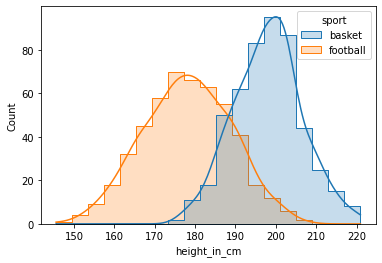

In [11]:
ax = sns.histplot(data=sport_df,x='height_in_cm',hue='sport',element='step',kde=True)

# T-test calculations

$ t = {\hat{x}_{1} - \hat{x}_{2}} /  \sqrt{s^{2}_{1} / n_{1}  +  s^{2}_{2}/n_{2}} $

In [12]:
x1_m = sport_df.loc[sport_df.sport=='basket']['height_in_cm'].mean()

In [13]:
x2_m = sport_df.loc[sport_df.sport=='football']['height_in_cm'].mean()

In [14]:
x1_v = sport_df.loc[sport_df.sport=='basket']['height_in_cm'].var()

In [15]:
x2_v = sport_df.loc[sport_df.sport=='football']['height_in_cm'].var()

In [16]:
n = sport_df.loc[sport_df.sport=='football'].shape[0]

In [17]:
print('first group mean: ' + str(round(x1_m,2)))
print('second group mean: ' + str(round(x2_m,2)))
print('first group variance: ' + str(round(x1_v,2)))
print('second group variance: ' + str(round(x2_v,2)))
print('sample size: ' + str(n))

first group mean: 198.04
second group mean: 178.11
first group variance: 71.07
second group variance: 117.13
sample size: 500


In [18]:
signal = abs(x1_m - x2_m)

In [19]:
noise = np.sqrt(x1_v/n + x2_v/n)

In [20]:
t_value = signal/noise

In [21]:
t_value

32.477179621695846

The t-value indicates the number of standard deviations from the hypothetical t-distribution mean. The bigger it is, 
the most likely differences will be statistically significant

# t-test in scipy

In [22]:
from scipy import stats

## indipendent t-test

In [23]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test,

In [24]:
stats.ttest_ind(sport_df.loc[sport_df.sport=='basket']['height_in_cm'],
               sport_df.loc[sport_df.sport=='football']['height_in_cm'])

Ttest_indResult(statistic=32.477179621695846, pvalue=1.7991936959692628e-158)

A significant p-value (significancy level is often set normally at 0.05) informs us on how likely it would be to observe results
as or more extreme than the one we observed, under the null hypothesis $ h_{0} $

## one sample t-test

In [25]:
help(stats.ttest_1samp)

Help on function ttest_1samp in module scipy.stats.stats:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the mean of ONE group of scores.
    
    This is a two-sided test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.
    
    Parameters
    ----------
    a : array_like
        Sample observation.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then it must have the
        same shape as `a` excluding the axis dimension.
    axis : int or None, optional
        Axis along which to compute test; default is 0. If None, compute over
        the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': re

In [26]:
stats.ttest_1samp(sport_df.loc[sport_df.sport=='basket']['height_in_cm'],198)

Ttest_1sampResult(statistic=0.10146190046787389, pvalue=0.9192245558683695)

The p-value is fairly large, meaning we can't really afford to reject the null hypothesis that our sample comes
from a distribution with a mean of 198 cm

In [27]:
stats.ttest_1samp(sport_df.loc[sport_df.sport=='basket']['height_in_cm'],170)

Ttest_1sampResult(statistic=74.36753415734947, pvalue=3.687335923789493e-272)

We can indeed reject the null hypothesis of our sample coming from a distribution with mean 170, as this result would 
extremely unlikely

In [ ]:
help(stats.ttest_rel)